# Programming Quantum Computers
- <font color="red">For the Software Engineer</font>

# Chapter Ch05_01
# <font color="red">Hands-on</font>:  <font color="blue">Increment and Decrement</font> 

![QC_Programming-red](img/QC_Programming-red.png "QC_Programming-red")

<BR>
    
<font color="red">**Notice**</font>: All materials herein were created by **Matthew R. Versaggi (profversaggi@gmail.com)** and are released into the open source to foster growth and welfare of expanding the Quantum Computing domain - the only obligation one incurs when using, copying, distributing or referencing this is to kindly reference the author and send me an email so I know how useful the material is to you.

<font color="red">**Notice**</font>: Python Code contributions for the Circle Plots are the work of **David Radcliffe**.

## Pedagogical Approach: (<font color="red">**Read this first !**</font>)

This material is intended to educate **software engineers** in certain aspects of Quantum Computing, therefore its focus will be on conveying the conceptual ideas in a form digestible to them, and supporting it with exercises to reinforce those concepts. 

Because of that pedagogical approach, **this material won't lead with or heavily leverage the concepts and language indigenous to physics and math**, but only in those terms most easily digestible to the modern software engineer.

This Jupyter Notebook is <font color="red">**not intended as a stand alone educational vehicle**</font>  - it's meant to be accompanied by a decicated power point deck that contains the main concepts to be presented by an instructor - **it is intended as a vehicle for a hands on workshop environment to facilitate learning through a guided experience.**

> **Note:-** Because of the above educational approach:
1. There is a certain amount of basic Quantum Computing knowledge that is assumed.
2. An active internet connection is **always** assumed.
3. Online references/links will be provided where appropriate
4. References to books will be made where appropriate
5. Much of this material is **dense and detailed**, the reader is <font color="red">**cautioned**</font> to be careful and slow to digest the *nuances* of the material.

## What you will be exposed to - High level: 

- Software engineers in the Quantum Computing space need to **<font color="blue">gain a mastery of the simulation frameworks and tools used to understand and solve problems quantumly</font>**. Under the hood, the **<font color="red">simulators mathematically represent the "Ideal" manifestations of quantum hardware</font>** that (theoretically) the "Actual" quantum hardware would behave exactly like. For the software engineer, this is the preferred situation as it permits them to understand and solve problems w/out being bound to the limitations of the hardware as it matures.


- Given the above, there are a host of technical concepts that need to be **<font color="red">understood experientially</font>** - we'll intentionally employ a vendor / framework agnostic approach to focus on the delivery of concept understanding and intuition procurement as the main value-add.


## Accompanying Text:

<BR>

<a href="https://www.amazon.com/Programming-Quantum-Computers-Essential-Algorithms/dp/1492039683" target="_blank"><img src="img/OreillyBookImage-small.png" height="250" align=left style="padding:15px;"></a>


> The core materials leveraged in this Jupyter Notebook comes from the following book, and is required reading to engage in the problem sets covered.

> The problem sets contained here will be expanded versions of the exercises contained in the book for sake of gaining intuition about the particular concept in question through leveraging various 'other' frameworks, tools, and instruments indigenous to the quantum programming space. 


> The core idea is that the various "simulators" circuitry (underlying mathematical representations) is considered the "Ideal" at the time of this JNB's construction, and therefore are the bect tools we have to address the problems we are interested in. To avoid being constrained by any particular framework, tool set, and software instruments, the idea is to leverage a host of appropriate "tools" when addressing any particular concept, problem or issue to remaind technology agnostic, but concept and intuition rich.


- **Note:** The problems explored are organized and ordered according to chapter.

<BR>

**<font color="red" size=4>Notice</font>:** - Prior to embarking on this notebook the reader is **highly encouraged to procure a <font color="red" size=4>reasonable</font> <font color="blue" size=4>introduction</font>** to the following key programming (and circuit) frameworks used:

0. <a href="https://oreilly-qc.github.io/" target="_blank"><font color="blue" size=4>QCEngine</font></a>
0. <a href="https://qiskit.org/textbook/preface.html" target="_blank"><font color="blue" size=4>Qiskit Tutorial</font></a>, <a href="https://qiskit.org/" target="_blank"><font color="blue" size=4>Qiskit Home</font></a>
0. <a href="https://algassert.com/quirk" target="_blank"><font color="blue">QUIRK</font></a>

# <font color="red">Example Problem(s):</font> 

**This example problem is archetypal** of how the exercises highlighted in the book can be expanded to include a host of other tools that help build understanding and intuition of the concepts being explored. 

- The <font color="blue">QCEngine</font> is a staple, but the <font color="blue">Bloch Sphere Playground Application</font>, the <font color="blue">Quantum Gate Playground</font>, <font color="blue">QUIRK</font>, and <font color="blue">Qiskit</font> are also instructive to leverage when persuing intuition about the concept and will be often used.

# Quantum Increment

![Quantum Increment Decrement](img/increment_decrement.png "Quantum Increment Decrement")

# <font color="blue">QCEngine</font>

In [1]:
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=5-1', width=900, height=900)

# <font color="blue">Qiskit</font>

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
## Uncomment the next line to see diagrams when running in a notebook
%matplotlib inline

In [2]:
## Example 5-1: Increment and Decrement

## Note that this looks different from the gates in the book, because
## we're building the operations from Toffoli gates

# Set up the program
a = QuantumRegister(4, name='a')
scratch = QuantumRegister(1, name='scratch')
qc = QuantumCircuit(a, scratch)

In [10]:
import numpy as np

# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    for result in state_vector:
        print("Normalized Result: " , round( np.abs(result)**2, 1) )

In [3]:
def main():
    ## initialization
    qc.x(a[0])
    qc.h(a[2])
    qc.rz(math.radians(45), a[2])
    qc.barrier()
    
    ## Increment
    add_int(a, 1)
    qc.barrier()
    
    ## Decrement (notice the "-1")
    add_int(a, -1)

In [4]:
###############################################
## Some utility functions

def add_int(qdest, rhs):
    reverse_to_subtract = False
    if rhs == 0:
        return
    elif rhs < 0:
        rhs = -rhs
        reverse_to_subtract = True
    ops = []
    add_val = int(rhs)
    condition_mask = (1 << len(qdest)) - 1

    add_val_mask = 1
    while add_val_mask <= add_val:
        cmask = condition_mask & ~(add_val_mask - 1)
        if add_val_mask & add_val:
            add_shift_mask = 1 << (len(qdest) - 1)
            while add_shift_mask >= add_val_mask:
                cmask &= ~add_shift_mask
                ops.append((add_shift_mask, cmask))
                add_shift_mask >>= 1
        condition_mask &= ~add_val_mask
        add_val_mask <<= 1
    if reverse_to_subtract:
        ops.reverse()
    for inst in ops:
        op_qubits = []
        mask = 1
        for i in range(len(qdest)):
            if inst[1] & (1 << i):
                op_qubits.append(qdest[i])
        for i in range(len(qdest)):
            if inst[0] & (1 << i):
                op_qubits.append(qdest[i])
        multi_cx(op_qubits)

def multi_cz(qubits):
    ## This will perform a CCCCCZ on as many qubits as we want,
    ## as long as we have enough scratch qubits
    multi_cx(qubits, do_cz=True)

def multi_cx(qubits, do_cz=False):
    ## This will perform a CCCCCX with as many conditions as we want,
    ## as long as we have enough scratch qubits
    ## The last qubit in the list is the target.
    target = qubits[-1]
    conds = qubits[:-1]
    scratch_index = 0
    ops = []
    while len(conds) > 2:
        new_conds = []
        for i in range(len(conds)//2):
            ops.append((conds[i * 2], conds[i * 2 + 1], scratch[scratch_index]))
            new_conds.append(scratch[scratch_index])
            scratch_index += 1
        if len(conds) & 1:
            new_conds.append(conds[-1])
        conds = new_conds
    for op in ops:
        qc.ccx(op[0], op[1], op[2])
    if do_cz:
        qc.h(target)
    if len(conds) == 0:
        qc.x(target)
    elif len(conds) == 1:
        qc.cx(conds[0], target)
    else:
        qc.ccx(conds[0], conds[1], target)
    if do_cz:
        qc.h(target)
    ops.reverse()
    for op in ops:
        qc.ccx(op[0], op[1], op[2])

In [5]:
main()

In [6]:
## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

|1> (0.707+0j)
|5> (0.5+0.5j)


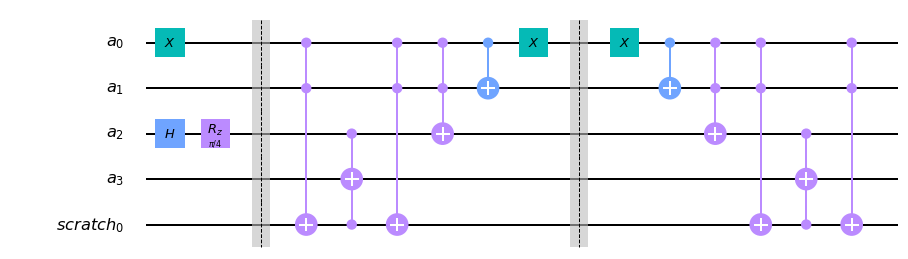

In [7]:
outputstate = result.get_statevector(qc, decimals=3)

for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        print('|{}> {}'.format(i, amp))
        
        
qc.draw(output='mpl')        # draw the circuit

In [12]:
# print(normalize_state_Vector(outputstate))

![the-end](img/the-end.png "the-end")